# Explore RoadSafety Accidents 2014

TODO
* can this be merged with RoadSafety_Vehicles to add sex and age of driver?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# ctrl B for the inline tmp-run box

FIGSIZE = (12,8)

In [2]:
df=pd.read_csv("data/DfTRoadSafety_Accidents_2014.csv")
#df = df[:10000]
df['freq'] = 1
# get string Date and Time cols and set the Index as a DateTime object
datetime_ser = df.apply(lambda x: x.Date + " " + x.Time, axis=1)
df = df.set_index(pd.to_datetime(datetime_ser, dayfirst=True))
del df['Date']
del df['Time']
df.head()

,﻿Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,freq
2014-01-09 13:21:00,201401BS70001,524600,179020,-0.206443,51.496345,1,3,2,1,5,...,0,1,2,2,0,0,1,2,E01002814,1
2014-01-20 23:00:00,201401BS70002,525780,178290,-0.189713,51.489523,1,3,2,1,2,...,5,7,1,1,0,0,1,2,E01002894,1
2014-01-21 10:40:00,201401BS70003,526880,178430,-0.173827,51.490536,1,3,2,1,3,...,0,1,1,1,0,0,1,1,E01002822,1
2014-01-15 17:45:00,201401BS70004,525580,179080,-0.192311,51.496668,1,3,1,1,4,...,1,4,1,1,0,0,1,2,E01002812,1
2014-01-09 08:50:00,201401BS70006,527040,179030,-0.171308,51.495892,1,3,2,1,5,...,8,1,1,1,0,0,1,1,E01002821,1


In [18]:
df.columns

Index(['﻿Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'freq', 'DateTime', 'Hour',
       'days_of_week'],
      dtype='object')

# Overview of number of accidents per day for 2014

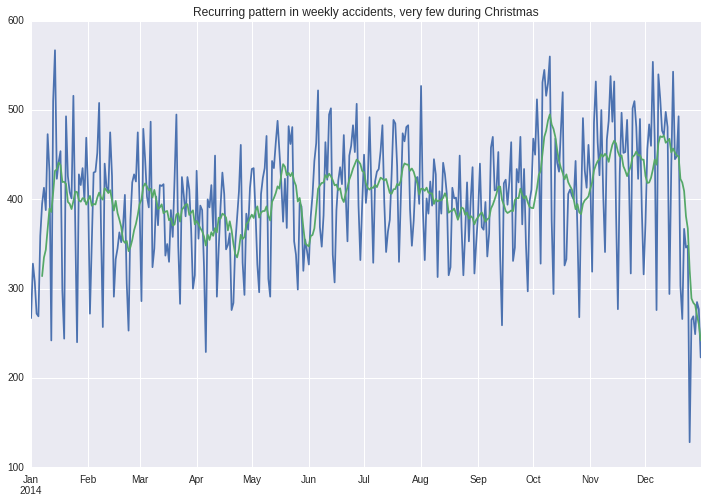

In [3]:
fig, ax = plt.subplots(figsize=(12,8))
accidents_all_year = df['freq'].resample("D").count()
accidents_all_year.plot(ax=ax)
#pd.rolling_mean(accidents_all_year, window=7).plot(ax=ax)
accidents_all_year.rolling(center=False, window=7).mean().plot(ax=ax)
plt.title("Recurring pattern in weekly accidents, very few during Christmas")
# Summer hols?
# April bank hols and Easter?
# Why Oct spike?
# Could we warn people about expected road behaviour, especially if you're not a commute driver?

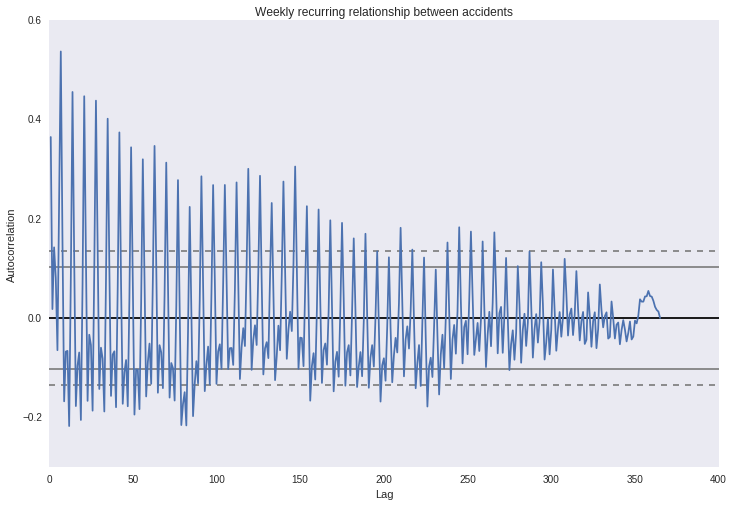

In [4]:
from pandas.tools.plotting import autocorrelation_plot
#%matplotlib matplotlib
fig, ax = plt.subplots(figsize=FIGSIZE)
autocorrelation_plot(accidents_all_year, ax=ax)
plt.title("Weekly recurring relationship between accidents")

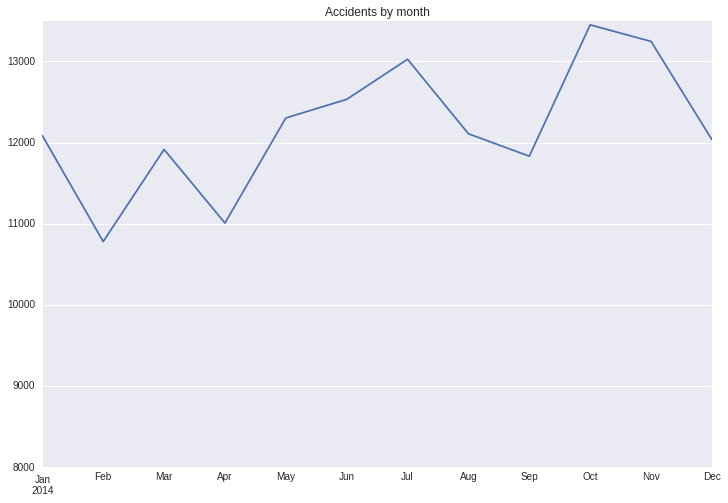

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
accidents_all_year_by_month = df['freq'].resample("M").count()
accidents_all_year_by_month.plot(ax=ax)
_=plt.ylim(ymin=8000)
_=plt.title("Accidents by month")

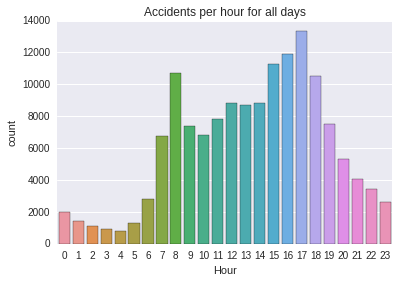

In [5]:
df['DateTime'] = df.index
df['Hour'] = df.index.hour
sns.countplot(data=df, x='Hour')
plt.title("Accidents per hour for all days")

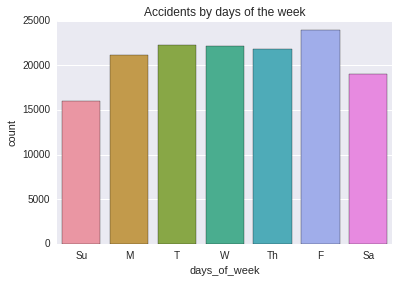

In [6]:
days_of_week_names = ["Su", "M", "T", "W", "Th", "F", "Sa"]
days_of_week = dict(zip(range(1, 8), days_of_week_names))
# days of week as specified in http://data.dft.gov.uk/road-accidents-safety-data/Road-Accident-Safety-Data-Guide.xls
df['days_of_week'] = df.Day_of_Week.apply(lambda x: days_of_week[x])
sns.countplot(data=df, x="days_of_week", order=days_of_week_names)
plt.title("Accidents by days of the week")

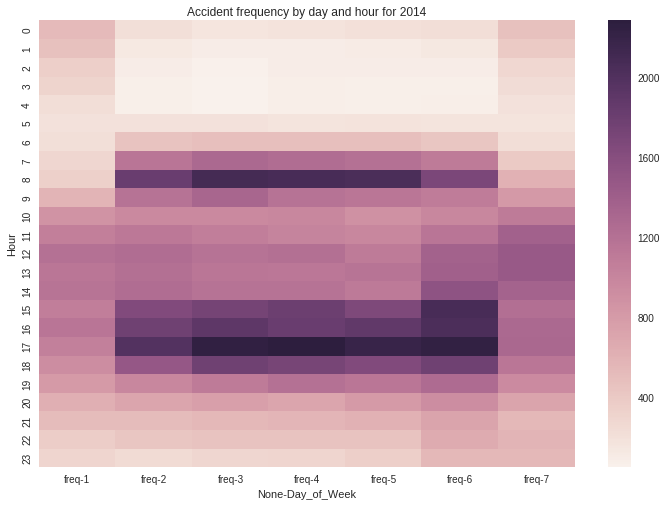

In [16]:
dow = 'Day_of_Week'
#dow = 'days_of_week'
df_days_vs_hours = df.reset_index()[['Hour', dow]]
df_days_vs_hours['freq']=1
grouped = df_days_vs_hours.groupby(['Hour', dow], sort=True).sum()
ungrouped = grouped.unstack().fillna(0)
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(ungrouped, ax=ax)
# Note freq-1 is Sunday, freq-2 is Monday...freq-6 is Friday, freq-7 is Saturday
# TODO label x-axis, reverse sort of y-axis
plt.title("Accident frequency by day and hour for 2014")

# Vehicles, speed limit and casualties

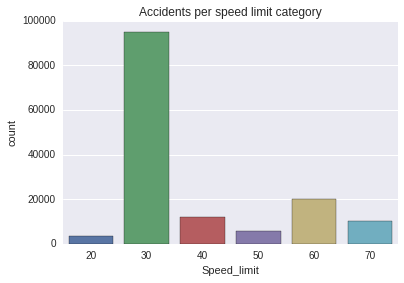

In [8]:
sns.countplot(data=df, x="Speed_limit")
plt.title("Accidents per speed limit category")

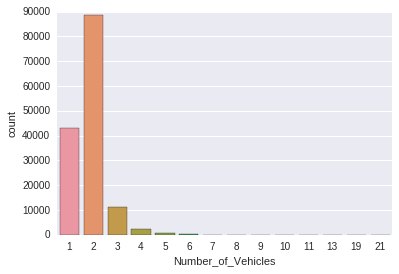

In [9]:
sns.countplot(data=df, x="Number_of_Vehicles")

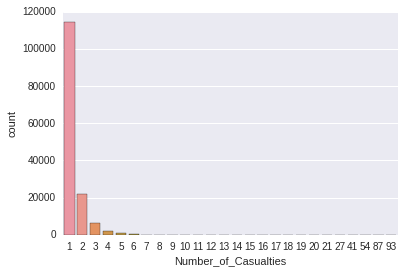

In [10]:
sns.countplot(data=df, x="Number_of_Casualties")